## Name - Prasad Ligade

# Predicting Price of House using KNearestNeighbour Regressor

## Use KNearestNeighbourRegressor to Predict Price of House.

- Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

1. Use pandas to get some insights into the data (10 marks)
2. Show some interesting visualization of the data (10 marks)
3. Manage data for training & testing (20)
4. Finding a better value of k (10)

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) Use pandas to get some insights into the data

In [2]:
#load the dataset
data = pd.read_csv('house_rental_data.csv.txt', sep = ",")
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
data.shape

(645, 8)

In [4]:
#remove unnessesary column
data = data.drop('Unnamed: 0', axis = 1)
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [5]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [7]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [9]:
#renaming column name
data.rename(columns = {'Living.Room': 'Living_Room'}, inplace = True)

In [10]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [11]:
# check the null values
data.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living_Room    0
Bathroom       0
Price          0
dtype: int64

## 2) Show some interesting visualization of the data

<AxesSubplot:xlabel='Bedroom', ylabel='count'>

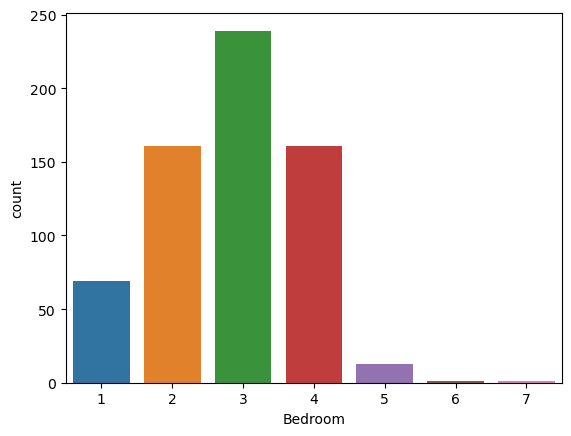

In [12]:
sns.countplot( x = data['Bedroom'])

<AxesSubplot:xlabel='Living_Room', ylabel='count'>

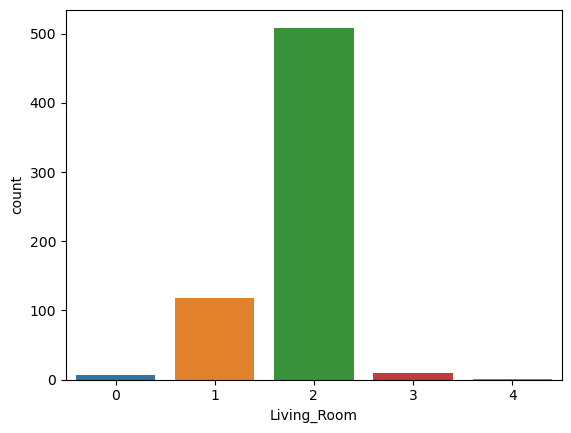

In [13]:
sns.countplot( x = data['Living_Room'])

<AxesSubplot:xlabel='TotalFloor', ylabel='Count'>

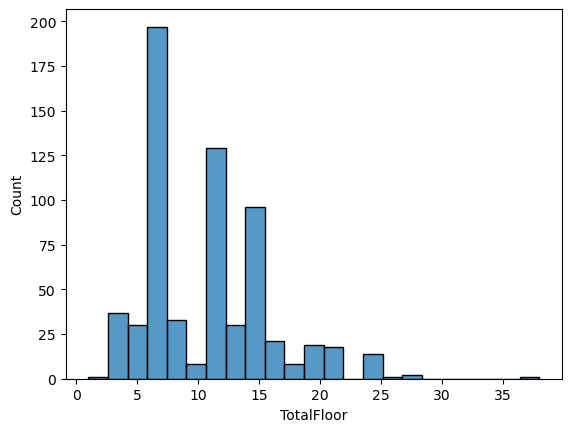

In [14]:
sns.histplot( x = data['TotalFloor'])

<AxesSubplot:>

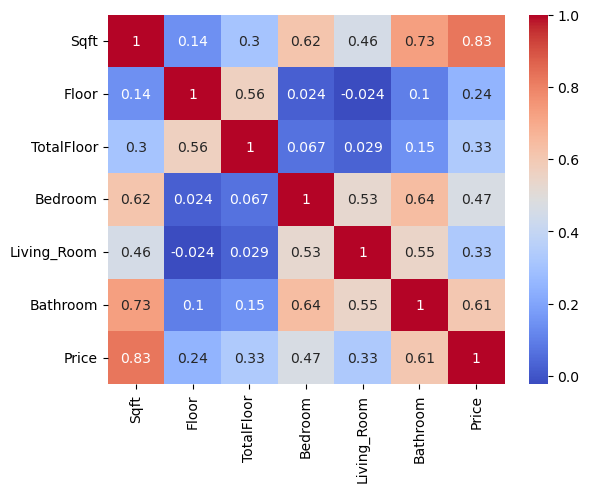

In [15]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

## 3) Manage data for training & testing

In [16]:
X = data.drop('Price', axis = 1)

y = data['Price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [19]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
y_pred = knr.predict(X_test)
y_pred

array([ 41400. ,  41400. ,  60200. ,  44000. ,  92599.8,  66000. ,
        87600. ,  86200. ,  67600. ,  34599.8,  59177.6,  37800. ,
        43400. ,  42200. ,  23277.6,  73800. ,  60624. ,  38900. ,
        42600. ,  33200. ,  58400. ,  48400. ,  40600. , 201000. ,
       201200. ,  49500. ,  61600. ,  37360. ,  37600. ,  34800. ,
        44520. ,  82200. ,  82999.8,  33000. ,  37800. ,  57560. ,
        97000. ,  64400. ,  61100. ,  68000. ,  66600. , 153800. ,
        73800. ,  97000. ,  40739.8,  33000. ,  33300. ,  42405.4,
        68520. ,  29419.8,  51599.8,  67600. , 197200. ,  84000. ,
        64400. ,  67600. , 106999.8,  38200. ,  79599.8,  74200. ,
        92599.8, 129599.8,  87600. ,  60000. ,  98199.8,  38800. ,
        34099.8,  36606.4,  23277.6,  60200. ,  29800. ,  34099.8,
        31000.4,  23277.6,  70599.8,  31766.4,  77999.6,  47600. ,
        45800. ,  45000. ,  70599.8,  88799.8,  43400. ,  32700.4,
        40739.8,  25900. , 129599.8,  90000. ,  37800. ,  4120

In [21]:
X_test

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom
632,1099.422,2,7,4,2,2
592,1102.980,2,4,2,2,2
599,1458.780,21,27,3,2,2
291,761.412,8,13,1,1,1
72,1892.856,2,7,4,2,3
...,...,...,...,...,...,...
513,843.246,2,18,1,1,1
631,996.240,3,5,3,1,1
215,1743.420,3,12,3,2,2
608,711.600,8,12,1,2,1


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7028529270810101

## 4) Finding a better value of k

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 20616.629261933944
RMSE value for k=  2 is: 22230.692223074257
RMSE value for k=  3 is: 20960.370168207573
RMSE value for k=  4 is: 20346.214584930694
RMSE value for k=  5 is: 20649.269817043274
RMSE value for k=  6 is: 20093.0092304023
RMSE value for k=  7 is: 19464.74654490594
RMSE value for k=  8 is: 19587.261151836225
RMSE value for k=  9 is: 19761.6033221884
RMSE value for k=  10 is: 19926.559453124733
RMSE value for k=  11 is: 20184.222682706422
RMSE value for k=  12 is: 19942.077143516548
RMSE value for k=  13 is: 20059.67702309777
RMSE value for k=  14 is: 19999.013496564912
RMSE value for k=  15 is: 20130.74947152932
RMSE value for k=  16 is: 20059.86904919002
RMSE value for k=  17 is: 20212.186349535576
RMSE value for k=  18 is: 20236.18325982171
RMSE value for k=  19 is: 20254.286006555176
RMSE value for k=  20 is: 20248.72045711213


- At k = 1 we get the highest RMSE value. The RMSE value decreases as we increase the k value. At k= 11, the RMSE is approximately 17315 and shoots upon further increasing the k value. We can safely say that k=11 will give us the best result in this case. 

In [25]:
knr2 = KNeighborsRegressor(n_neighbors = 11)
knr2

KNeighborsRegressor(n_neighbors=11)

In [26]:
knr2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [27]:
y_pred_2 = knr2.predict(X_test)

In [28]:
r2_score(y_test, y_pred_2)

0.7160864525565045